### 통계 두개를 비교하는건 python엔 없어, 통계 배우는 사람은 t검정을 제일 많이 사용
### 검증은 무조건 가설이 있어야함
### p-value 유의수준

# 카이제곱 검정
### chisq.test()
: 두 범주(카테고리)형 변수가 서로 상관이 있는지 통계정 검정방법
- 예) 학력,성별,직업의 만족도...


- 가설 = 시나리오
- 검정 = 테스트

#### 가설 : 아동별 장난감 보유 현황
- 귀무가설(니가 뭐라고 말하든 변하는거 없어!당연한거! 분석할 가치가 없는것)
>child 1 과 child 2의 장난감 보유수에 대한 만족도 차이가 없다.
- 대립가설(귀무가설과 완전 반대)
>child 1 과 child 2의 장난감 보유수에 대한 만족도 차이가 있다.
- 왜 차이가 나는지 이제 분석을 해보자!

In [1]:
#child 장난감 보유현황.
child1 <- c(5,11,1) 
child2 <-c(4,7,3)

In [2]:
#분석을 위해 데이터 합치기
Toy <- cbind(child1,child2)
Toy

child1,child2
5,4
11,7
1,3


In [3]:
#장난감 이름 정해주기
rownames(Toy) <- c("car","truck", "doll")
Toy

,child1,child2
car,5,4
truck,11,7
doll,1,3


In [4]:
#카이제곱 검정 실시
chisq.test(Toy)

# 가장 중요한건 : p-value 유의수준?

Warning message in chisq.test(Toy):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론
- 가장 중요한건 : p-value 유의수준
####  p-value = 0.4219 > 0.05(95% 신뢰구간) -> 귀무가설 채택
> child1과 child2의 데이터는 통계적으로 큰 차이가 없다.
> 저 데이터가지고는 분석할 거리가 안된다!
> 
####  p-value는 0에 가까울수록 좋다.
> 미리 정해진 유의수준(일반적으로 R에서는 0.05)보다 작으면 대립가설을 채택하고 유의수준보다 크면 귀무가설을 채택.

In [5]:
cor(child1,child2)

[1] 0.9862414

### 메세지
- “Chi-squared approximation may be incorrect”
> 카이제곱의 근사값이 정확하지 않을수도 있다.
- 데이터 양이 적은경우 발생

---
# 피셔 검정
### fisher.test()
> 데이터 양이 적을경우 사용


- 원래는 카이제곱을 더 많이 사용

In [6]:
fisher.test(Toy)


	Fisher's Exact Test for Count Data

data:  Toy
p-value = 0.5165
alternative hypothesis: two.sided


p-value = 0.5165 > 0.05 --> 귀무가설

---
# t-검정

#### 데이터의 분포가 정규분포인지 확인
> Shapiro-Wilk검정을 실시(귀무나 대립가설이 이미 정해져있음.)<br>
> Shapiro-Wilk검정을 먼저 실행후 진행해야함(아니면 사이비..)
- 귀무가설 : 자료가 정규분포를 따른다.
- 대립가설 : 자료가 정규분포를 따르지 않는다.
- ================================================<br><br>
### t.test()

- 가설 : 건전지가 1000시간 간다고 했는데 그거보다 짧게 수명이 다되었다!
> 다른사람이 한 말이 진짜인이 아닌지를 볼때 사용(평균!)


- 귀무가설 (분석할 필요가 없다) -> 건전지 수명은 1000시간이다.
- 대립가설 ->  건전지 수명은 1000시간이 아니다.
- ================================================<br><br>

#### 't.test(bat, mu=1000, alternative = "two.sided")'
- mu : 비교하는 대상의 평균
- alternative :
- ~two.sided : 데이터가 평균과 다르다.
- ~greater : 데이터가 평균보다 크다.
- ~less : 데이터가 평균보다 적다.

In [7]:
bat <- c(980, 1008, 968, 1032, 1012, 1002, 996, 1017)
# 진짜인지 아닌지 확인 : 정규 분포도

#### 데이터의 분포가 정규분포인지 확인
> Shapiro-Wilk검정을 실시(귀무나 대립가설이 이미 정해져있음.)
- 귀무가설 : 자료가 정규분포를 따른다.
- 대립가설 : 자료가 정규분포를 따르지 않는다.


In [8]:
shapiro.test(bat)


	Shapiro-Wilk normality test

data:  bat
W = 0.97706, p-value = 0.9469


p-value = 0.9469 > 0.05 ---> 귀무가설

In [9]:
#t검정 실시
t.test(bat, mu=1000, alternative = "two.sided")

#mu : 비교하는 대상의 평균
#alternative :
#- two.sided : 데이터가 평균과 다르다.
#- greater : 데이터가 평균보다 크다.
#- less : 데이터가 평균보다 적다.


	One Sample t-test

data:  bat
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


p-value = 0.8032 > 0.05 ---> 귀무가설 : 건전지의 수명은 1000시간이다.

# Ex2)

##### 어떤 학급의 수학점수 평균 : 55점
##### 0교시 수업을 한 후에 학생들의 성적이 올랐을까?
##### 귀무가설 : 성적은 오르지 않았다.
##### 대립가설 : 성적이 올랐다.

In [12]:
exam <-read.csv("Rdata/exam.csv")
head(exam)

no,score
1,58
2,49
3,39
4,99
5,32
6,88


In [14]:
tail(exam)

,no,score
12,12,55
13,13,57
14,14,53
15,15,88
16,16,42
17,17,39


In [21]:
str(exam)

'data.frame':	17 obs. of  2 variables:
 $ no   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ score: int  58 49 39 99 32 88 62 30 55 65 ...


In [28]:
summary(a)
# 평균이 중앙값보다 크다

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   42.00   55.00   56.18   62.00   99.00 

In [24]:
a <- exam$score

In [25]:
shapiro.test(a)


	Shapiro-Wilk normality test

data:  a
W = 0.91143, p-value = 0.1058


In [26]:
#p-value = 0.1058 > 0.05 ==> 정규분포
mean(a)

[1] 56.17647

In [31]:
# t.test
t.test(a, mu=55, alternative = "greater")


	One Sample t-test

data:  a
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


p-value = 0.4046 > 0.05 귀무가설 --> 성적은 오르지 않았다<br>
하지만 평균은 올랐다<br>
이상치가 있지 않을까?

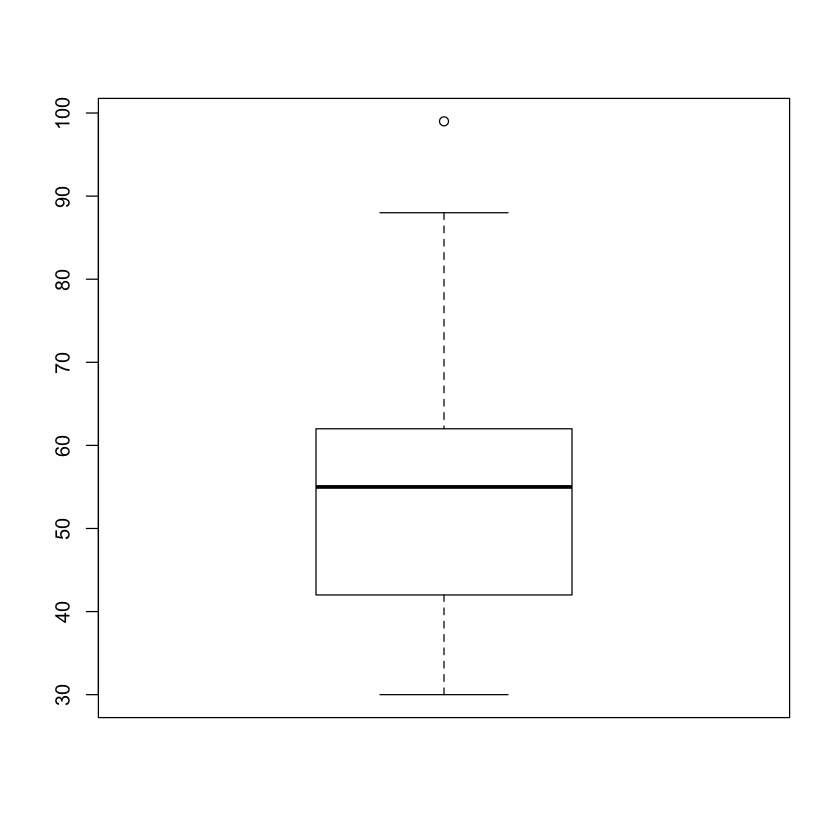

In [36]:
boxplot(a)
#이상치 : 99

## Ex 3)
#### 표본이 2개인 t 검정
##### 귀무가설 : 복용 전후의 차이가 없다.
##### 대립가설 : 복용 전후의 차이가 있다.

In [37]:
preMedicine <- read.csv("Rdata/preMedicine.csv")
postMedicine <- read.csv("Rdata//postMedicine.csv")

In [ ]:
head(,1)
head(,1)

In [38]:
pre <- preMedicine$data
post <- postMedicine$data

In [40]:
t.test(pre,post ,alternative = "two.sided")


	Welch Two Sample t-test

data:  pre and post
t = -0.36891, df = 17.987, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.745046  1.925046
sample estimates:
mean of x mean of y 
    10.63     11.04 


p-value = 0.7165 --> 귀무가설(약효가 없다)<br>
통계할때 데이터 위치 바꾸면 안됨

---
# 상관계수
- 이것도 중요한건 순서<br><br>


### 피어슨 상관계수
> method="pearson"<br>
> 피어슨은 디폴트값<br>

<br>

### 스피어맨 상관계수
> method="spearman"<br>
> 데이터가 5개보다 적으면 무조건 스피어맨

In [45]:
y <- c(1,2,3,4)
z <- c(0,7,5,9)

cor(y,z)

[1] 0.8356578

### 피어슨 상관계수

In [44]:
cor(y,z,method="pearson")

[1] 0.9693631

### 스피어맨 상관계수

In [46]:
cor(y,z,method="spearman")

[1] 0.8

---

## 콜모고로프 - 스미노프 검정(KS Test)
: 주어진 2개의 데이터가 같은 분포를 이루는지 검정

- 귀무, 대립가설이 정해져 있음!
> 귀무가설 : 두개의 데이터의 분포가 다르다<br>
> 대립가설 : 두개의 데이터의 분포가 같다

In [51]:
x <- rnorm(50)
y <- runif(50)

ks.test(x,y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.38, p-value = 0.001315
alternative hypothesis: two-sided


p-value = 0.001315 < 0.05 --> 대립가설

---

## 부호검정
:두개의 데이터 사이에 차이가 있는지 검정하는것
- 음료에 대한걸 많이한대

#### 식사전과 식사후의 음료수 맛에 대한 평가


In [58]:
# 식전음료수 맛에 대한 평가 점수
x <- c(4,1,1,4,3,3,2,5,3,3)

#식후음료수 맛에 대한 평가 점수
y <- c(1,1,3,2,5,1,4,4,3,1)

- 귀무가설 : 유의한 차이가 없다.
- 대립가설 : 유의한 차이가 있다.

In [60]:
length(x[x>y])
length(x[x<y])

[1] 5

[1] 3

In [63]:
# 백터로만들어줘서 검증
binom.test(c(length(x[x>y]),length(x[x<y])))


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


p-value = 0.7266 > 0.05 --> 귀무가설

---

## 비율검정
 : 2개의 데이터 사이에 비율의 차이가 있는지에 대한것을 검정

#### 맥주를 좋아하시나요? 라는 질문에 서울에서는 400명중 360명, 부산에서는 200명중 136명이 좋아한다고 답했다면, 둘의 비율 차이가 있다고 할 수 있는가?

- 귀무가설 : 유의한 차이가 없다.
- 대립가설 : 유의한 차이가 있다.

In [69]:
hite <- c(360,136)
sample <- c(400, 200)

prop.test(hite, sample)


	2-sample test for equality of proportions with continuity correction

data:  hite out of sample
X-squared = 43.515, df = 1, p-value = 4.207e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


p-value = 4.207e-11 < 0.05 ---> 대립가설 : 유의한 차이가 있다.
- 4.207e-11 = 4.207 × 10-11 = 0.00000000004207